# 数据预处理

In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('data/sales.csv', sep=',', encoding='gbk')
df1.head()

c:\Users\OneRaise\miniconda3\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\OneRaise\miniconda3\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\OneRaise\miniconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,序号,天气,是否周末,是否有促销,销量
0,1,坏,是,是,高
1,2,坏,是,是,高
2,3,坏,是,是,高
3,4,坏,否,是,高
4,5,坏,是,是,高


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   序号      34 non-null     int64 
 1   天气      34 non-null     object
 2   是否周末    34 non-null     object
 3   是否有促销   34 non-null     object
 4   销量      34 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.5+ KB


In [3]:
# 行数
df1.shape[0]

34

In [4]:
# 列数
df1.shape[1]

5

In [5]:
# 查看数据类型
type(df1)

pandas.core.frame.DataFrame

In [6]:
# 查看数据类型
df1.dtypes

序号        int64
天气       object
是否周末     object
是否有促销    object
销量       object
dtype: object

In [7]:
# 查看数据分布
df1.describe()

,序号
count,34.000000
mean,17.500000
std,9.958246
min,1.000000
25%,9.250000
50%,17.500000
75%,25.750000
max,34.000000


In [8]:
# 查看是否有缺失值
df = pd.read_csv('data/items.csv', sep=',', encoding='gbk')
df.isnull()

,item1,item2,item3,item4,item5,item6
0,True,False,False,False,False,True
1,False,False,True,False,False,True
2,False,False,False,True,False,True
3,False,False,False,True,True,True
4,False,False,True,True,False,True


In [9]:
# 统计缺失值的数量
df.isnull().sum()

item1    1
item2    0
item3    2
item4    3
item5    1
item6    5
dtype: int64

In [10]:
# 缺失值删除
df.dropna()

,item1,item2,item3,item4,item5,item6


In [11]:
# 当整列均为缺失值的时候才删除，整行时axis的值为0
df.dropna(how='all', axis=1)

,item1,item2,item3,item4,item5
0,NaN,1,1.0,1.0,1.0
1,2.0,2,NaN,2.0,2.0
2,3.0,3,3.0,NaN,3.0
3,4.0,4,4.0,NaN,NaN
4,5.0,5,NaN,NaN,5.0


In [12]:
# 当有一个缺失值时整列都删除，整行时axis的值为0
df.dropna(how='any', axis=1)

,item2
0,1
1,2
2,3
3,4
4,5


In [13]:
# 用列数据的均值进行填充
df.fillna(df.mean())

,item1,item2,item3,item4,item5,item6
0,3.5,1,1.000000,1.0,1.00,NaN
1,2.0,2,2.666667,2.0,2.00,NaN
2,3.0,3,3.000000,1.5,3.00,NaN
3,4.0,4,4.000000,1.5,2.75,NaN
4,5.0,5,2.666667,1.5,5.00,NaN


In [14]:
# 用缺失值后面的数据进行填充
df.fillna(method='bfill')

C:\Users\OneRaise\AppData\Local\Temp\ipykernel_23100\2957758710.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill')


,item1,item2,item3,item4,item5,item6
0,2.0,1,1.0,1.0,1.0,NaN
1,2.0,2,3.0,2.0,2.0,NaN
2,3.0,3,3.0,NaN,3.0,NaN
3,4.0,4,4.0,NaN,5.0,NaN
4,5.0,5,NaN,NaN,5.0,NaN


In [15]:
# 用缺失值前面的值进行填充
df.fillna(method='ffill')

C:\Users\OneRaise\AppData\Local\Temp\ipykernel_23100\2615602360.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,item1,item2,item3,item4,item5,item6
0,NaN,1,1.0,1.0,1.0,NaN
1,2.0,2,1.0,2.0,2.0,NaN
2,3.0,3,3.0,2.0,3.0,NaN
3,4.0,4,4.0,2.0,3.0,NaN
4,5.0,5,4.0,2.0,5.0,NaN


- `使用二次多项式插值进行填充`
- `使用三次样条插值进行填充`

In [16]:
df2=pd.DataFrame({'item1':[4,2,3,3,None],'item2':[1,2,None,None,5],
                 'item3':[2,2,2,2,2],'item4':[1,2,None,None,5],
                 'item5':[1,2,3,3,None],'item6':[3,2,None,None,None]})
df2

,item1,item2,item3,item4,item5,item6
0,4.0,1.0,2,1.0,1.0,3.0
1,2.0,2.0,2,2.0,2.0,2.0
2,3.0,NaN,2,NaN,3.0,NaN
3,3.0,NaN,2,NaN,3.0,NaN
4,NaN,5.0,2,5.0,NaN,NaN


In [17]:
# 发现重复值
df2.duplicated()

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [18]:
df3 = pd.read_csv('data/work.csv', sep=',', encoding='gbk')
df3.head()

,日期,销售
0,2010,2342
1,2011,2840
2,2012,3349
3,2013,5
4,2014,5845


In [19]:
# query检测异常值
df3.query('销售<1000')

,日期,销售
3,2013,5


{'whiskers': [<matplotlib.lines.Line2D at 0x21183a7ff10>,
 'caps': [<matplotlib.lines.Line2D at 0x21183a59110>,
 'boxes': [<matplotlib.lines.Line2D at 0x211839dd010>],
 'medians': [<matplotlib.lines.Line2D at 0x21183a8f190>],
 'fliers': [<matplotlib.lines.Line2D at 0x21183a8fc90>],
 'means': []}

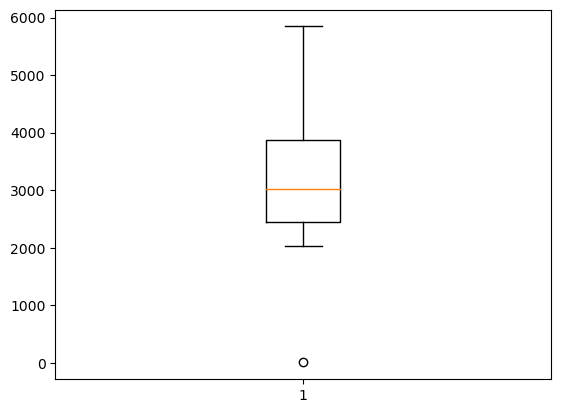

In [20]:
# 箱线图检测异常值
import matplotlib.pyplot as plt
plt.boxplot(df3['销售'])

In [21]:
df3.drop(index=3)

,日期,销售
0,2010,2342
1,2011,2840
2,2012,3349
4,2014,5845
5,2015,2034
6,2016,3021
7,2017,2540
8,2018,3098
9,2019,4410
10,2020,5025


In [22]:
# 查看数据类型
import numpy as np
arr1 = np.arange(1, 10, 2)
arr1.dtype

dtype('int32')

In [23]:
arr0 = np.arange(1, 2, 0.2)
arr0.dtype

dtype('float64')

In [24]:
# 数据类型转换
arr1.astype(np.float64)

array([1., 3., 5., 7., 9.])

In [25]:
arr0.astype(np.int64)

array([1, 1, 1, 1, 1], dtype=int64)

In [26]:
# 设置索引
df3.set_index('日期').head()

,销售
日期,
2010,2342
2011,2840
2012,3349
2013,5
2014,5845


In [27]:
# 在导入数据的过程中也能设置索引
df3 = pd.read_csv('data/work.csv', sep=',', encoding='gbk', index_col='日期')
df3.head()

,销售
日期,
2010,2342
2011,2840
2012,3349
2013,5
2014,5845


In [28]:
s1 = pd.Series([88, 60, 75], index=[1, 2, 3])
s1

1    88
2    60
3    75
dtype: int64

In [29]:
# 重命名索引
s1.reindex([1, 2, 3, 4, 5])

1    88.0
2    60.0
3    75.0
4     NaN
5     NaN
dtype: float64

In [30]:
data = [[110,105,99],[105,88,115],[109,120,130]]
index = ['stu1','stu3','stu5']
columns = ['语文','英语','数学']
df4 = pd.DataFrame(data=data,index=index,columns=columns)
df4

,语文,英语,数学
stu1,110,105,99
stu3,105,88,115
stu5,109,120,130


In [31]:
# 重命名索引
df4 = df4.reindex(index=['stu1', 'stu2', 'stu3', 'stu4', 'stu5'],
            columns=['语文', '物理', '数学', '英语'])
df4

,语文,物理,数学,英语
stu1,110.0,NaN,99.0,105.0
stu2,NaN,NaN,NaN,NaN
stu3,105.0,NaN,115.0,88.0
stu4,NaN,NaN,NaN,NaN
stu5,109.0,NaN,130.0,120.0


In [32]:
df4.insert(2, '化学', [100, 100, 100, 100, 40])
df4

,语文,物理,化学,数学,英语
stu1,110.0,NaN,100,99.0,105.0
stu2,NaN,NaN,100,NaN,NaN
stu3,105.0,NaN,100,115.0,88.0
stu4,NaN,NaN,100,NaN,NaN
stu5,109.0,NaN,40,130.0,120.0


In [33]:
# 删除行数据
df4.drop(labels='stu1')

,语文,物理,化学,数学,英语
stu2,NaN,NaN,100,NaN,NaN
stu3,105.0,NaN,100,115.0,88.0
stu4,NaN,NaN,100,NaN,NaN
stu5,109.0,NaN,40,130.0,120.0


In [34]:
# 删除列数据
df4.drop(columns='物理')

,语文,化学,数学,英语
stu1,110.0,100,99.0,105.0
stu2,NaN,100,NaN,NaN
stu3,105.0,100,115.0,88.0
stu4,NaN,100,NaN,NaN
stu5,109.0,40,130.0,120.0
